In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from astropy.visualization import astropy_mpl_style, quantity_support

plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x738187fb91f0>

In [2]:
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.time import Time

In [3]:
from astroquery.simbad import Simbad

In [4]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [5]:
Simbad.add_votable_fields('sptype')
Simbad.add_votable_fields('flux(U)') # add the Vega unit Magnitude 
Simbad.add_votable_fields('flux(B)') # add the Vega unit Magnitude 
Simbad.add_votable_fields('flux(V)') # add the Vega unit Magnitude 
Simbad.add_votable_fields('flux(R)') # add the Vega unit Magnitude 
Simbad.add_votable_fields('flux(I)') # add the Vega unit Magnitude 

In [6]:
def hhmmss2deg(coord):
    hh,mm,ss = coord.replace(' ',':').split(':')
    hh = float(hh)
    mm = float(mm)
    ss = float(ss)
    H = hh+mm/60.+ss/3600.
    deg = H*360./24.
    return deg
    

In [7]:
def degmmss2deg(coord):
    deg,mm,ss = coord.replace(' ',':').split(':')
    deg = float(deg)
    mm = float(mm)
    ss = float(ss)
    if deg>=0.:
        Deg = deg+mm/60.+ss/3600.
    else:
        Deg = deg-mm/60.-ss/3600.
    return Deg
    

In [8]:
spectral_types = ['O','B','A','F','G','K','M']

In [9]:
file_label = 'FIELD_STARS_ACROSS_THE_H-R_DIAGRAM_Type_{0}.csv'

In [10]:
pre_targets = []

for spec_type_ in spectral_types:
    file_ = file_label.format(spec_type_)
    targets_file_ = open(os.path.join('spectral_atlases/',file_),'r').readlines()
    
    for line in targets_file_[1:]:
        target_ = line.split(',')[0]
        #print(target_)
        pre_targets.append(target_.replace(' ',''))

In [11]:
print('Number of initial targets = ', len(pre_targets))

Number of initial targets =  315


In [12]:
Simbad.query_object(pre_targets[0])

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SP_TYPE,SP_QUAL,SP_BIBCODE,FLUX_U,FLUX_B,FLUX_V,FLUX_R,FLUX_I,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,,mag,mag,mag,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,str1,object,float32,float32,float32,float32,float32,int32
* 9 Sgr,18 03 52.4450,-24 21 38.632,14,14,0.056,0.052,90,A,O,2020yCat.1350....0G,O4V((f))z,C,2014ApJS..211...10S,5.08,5.97,5.97,5.72,5.7,1


In [13]:
Simbad.query_object('HD2811')

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SP_TYPE,SP_QUAL,SP_BIBCODE,FLUX_U,FLUX_B,FLUX_V,FLUX_R,FLUX_I,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,,mag,mag,mag,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,str1,object,float32,float32,float32,float32,float32,int32
HD 2811,00 31 18.4898,-43 36 22.998,14,14,0.017,0.014,90,A,O,2020yCat.1350....0G,A3V,C,1978MSS...C02....0H,--,7.67,7.5,--,--,1


In [14]:
pre_target_dict = {}
print('Target name','  RA  ','  DEC  ','  B  ','  V  ','  B-V  ')
for target_ in pre_targets:
    target_ = target_.replace('-',' ')
    try:
        target_info_ = Simbad.query_object(target_)
        #print(target_info_)
        pre_target_dict[target_] = {}
        ra_ = str(target_info_['RA'][0]).replace(' ',':')
        dec_ = str(target_info_['DEC'][0]).replace(' ',':')
        b_ = float(target_info_['FLUX_B'][0])
        v_ = float(target_info_['FLUX_V'][0])
        r_ = float(target_info_['FLUX_R'][0])
        i_ = float(target_info_['FLUX_I'][0])
        b_v_ = b_-v_
        r_i_ = r_-i_

        print(target_,ra_,dec_,b_,v_,r_,i_,b_v_,r_i_)
        add_ = True
    except:
        #print(target_)
        add_ = False
        
    if add_:
        pre_target_dict[target_]['ra'] = ra_
        pre_target_dict[target_]['dec'] = dec_
        pre_target_dict[target_]['V'] = v_
        pre_target_dict[target_]['B'] = b_
        pre_target_dict[target_]['R'] = r_
        pre_target_dict[target_]['I'] = i_
        pre_target_dict[target_]['B_V'] = b_v_
        pre_target_dict[target_]['R_I'] = r_i_
    

Target name   RA     DEC     B     V     B-V  
HD164794 18:03:52.4450 -24:21:38.632 5.96999979019165 5.96999979019165 5.71999979019165 5.699999809265137 0.0 0.019999980926513672
HD97253 11:10:42.0464 -60:23:04.115 7.239999771118164 7.090000152587891 8.079999923706055 nan 0.14999961853027344 nan
HD163758 17:59:28.3669 -36:01:15.589 7.349999904632568 7.320000171661377 8.380000114440918 nan 0.029999732971191406 nan
HD94963 10:56:35.7867 -61:42:32.287 7.170000076293945 7.260000228881836 8.100000381469727 nan -0.09000015258789062 nan
HD148937 16:33:52.3869 -48:06:40.476 7.119999885559082 6.710000038146973 7.610000133514404 nan 0.4099998474121094 nan
HD163800 17:58:57.2584 -22:31:03.165 7.269999980926514 7.0 6.679999828338623 6.489999771118164 0.26999998092651367 0.19000005722045898
HD48099 06:41:59.2308 +06:20:43.532 6.320000171661377 6.369999885559082 6.300000190734863 6.349999904632568 -0.04999971389770508 -0.04999971389770508
HD155806 17:15:19.2478 -33:32:54.299 5.519999980926514 5.53000

/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: Us

HD94910 10:56:11.5781 -60:27:12.810 7.570000171661377 6.960000038146973 7.730000019073486 nan 0.6100001335144043 nan
HD46185 06:31:24.2362 -12:33:34.891 6.630000114440918 6.789999961853027 nan nan -0.15999984741210938 nan
HD168625 18:21:19.5484 -16:22:26.075 9.779999732971191 8.369999885559082 8.760000228881836 nan 1.4099998474121094 nan
HD67536 08:04:42.9317 -62:50:10.843 6.136000156402588 6.241000175476074 nan nan -0.10500001907348633 nan
HD37490 05:39:11.1457 +04:07:17.288 4.480000019073486 4.590000152587891 4.570000171661377 4.670000076293945 -0.1100001335144043 -0.09999990463256836
HD89587 10:19:02.5650 -50:42:57.955 6.73799991607666 6.875 nan nan -0.13700008392333984 nan
HD143448 16:03:44.4675 -60:29:54.471 7.25 7.300000190734863 8.289999961853027 nan -0.05000019073486328 nan
HD37055 05:35:35.9043 -03:15:10.219 6.289999961853027 6.409999847412109 nan nan -0.11999988555908203 nan
HD45725 06:28:49.0704 -07:01:59.013 4.5 4.599999904632568 nan nan -0.09999990463256836 nan
HD168607 18

/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:14: Us

HD90264 10:22:58.1465 -66:54:05.385 4.860000133514404 4.989999771118164 nan nan -0.12999963760375977 nan
HD64972 07:55:21.7596 -28:17:02.279 7.064000129699707 7.179999828338623 nan nan -0.11599969863891602 nan
HD123515 14:09:35.0324 -51:30:16.832 5.913000106811523 5.960999965667725 nan nan -0.04799985885620117 nan
HD137509 15:31:27.1154 -71:03:43.664 6.760000228881836 6.869999885559082 nan nan -0.1099996566772461 nan
HD221507 23:32:58.2607 -37:49:05.825 4.28000020980835 4.369999885559082 4.369999885559082 4.440000057220459 -0.08999967575073242 -0.07000017166137695
HD46462 06:31:45.1957 -37:10:23.185 7.460000038146973 7.559999942779541 nan nan -0.09999990463256836 nan
HD51876 06:58:24.2463 -16:03:16.574 7.041999816894531 7.13100004196167 nan nan -0.08900022506713867 nan
HD100841 11:35:46.8780 -63:01:11.405 3.0999999046325684 3.140000104904175 3.0999999046325684 3.109999895095825 -0.040000200271606445 -0.009999990463256836
HD10840 01:44:32.9704 -61:01:07.339 6.710000038146973 6.789999961

/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: Us

HD97534 11:12:36.0132 -60:19:03.454 5.170000076293945 4.619999885559082 4.070000171661377 3.7100000381469727 0.5500001907348633 0.3600001335144043
HD73634 08:37:38.6329 -42:59:20.690 4.239999771118164 4.139999866485596 3.9800000190734863 3.8499999046325684 0.09999990463256836 0.13000011444091797
HD148898 16:32:08.2003 -21:27:59.052 4.559999942779541 4.449999809265137 4.320000171661377 4.300000190734863 0.1100001335144043 0.019999980926513672
HD81471 09:23:59.3339 -51:44:13.493 6.5929999351501465 6.085999965667725 7.03000020980835 nan 0.5069999694824219 nan
HD163318 17:56:41.8399 -28:03:55.421 5.964000225067139 5.763000011444092 nan nan 0.20100021362304688 nan
HD50241 06:48:11.4551 -61:56:29.000 3.4600000381469727 3.2300000190734863 nan nan 0.23000001907348633 nan
HD90132 10:23:29.2960 -38:00:35.425 5.564000129699707 5.328999996185303 nan nan 0.2350001335144043 nan
HD83368 09:36:25.4255 -48:45:04.240 6.489999771118164 6.230000019073486 nan nan 0.25999975204467773 nan
HD80404 09:17:05.40

/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: Us

HD122563 14:02:31.8455 +09:41:09.944 7.099999904632568 6.190000057220459 5.369999885559082 4.789999961853027 0.9099998474121094 0.5799999237060547
HD20010 03:12:04.5298 -28:59:15.439 4.510000228881836 3.9800000190734863 3.390000104904175 3.0799999237060547 0.5300002098083496 0.3100001811981201
HD7570 01:15:11.1214 -45:31:53.992 5.539999961853027 4.960000038146973 4.46999979019165 4.110000133514404 0.5799999237060547 0.3599996566772461
HD136351 15:22:08.2706 -47:55:40.053 5.5 5.0 nan nan 0.5 nan
HD30562 04:48:36.3850 -05:40:26.557 6.400000095367432 5.769999980926514 nan nan 0.630000114440918 nan
HD189340 19:59:47.2802 -09:57:29.634 6.449999809265137 5.869999885559082 nan nan 0.5799999237060547 nan
HD45067 06:25:16.5462 -00:56:45.178 6.429999828338623 5.900000095367432 nan nan 0.5299997329711914 nan
HD101947 11:43:31.1923 -62:29:21.827 5.829999923706055 5.03000020980835 4.269999980926514 3.9100000858306885 0.7999997138977051 0.3599998950958252
HD146143 16:17:00.9343 -50:04:05.237 5.88000

/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: Us

HD138716 15:34:10.7024 -10:03:52.317 5.630000114440918 4.619999885559082 3.8499999046325684 3.3299999237060547 1.010000228881836 0.5199999809265137
HD206778 21:44:11.1561 +09:52:30.031 3.9100000858306885 2.390000104904175 1.340000033378601 0.5799999833106995 1.5199999809265137 0.7600000500679016
HD140573 15:44:16.0741 +06:25:32.268 3.799999952316284 2.630000114440918 1.8200000524520874 1.25 1.1699998378753662 0.5700000524520874
HD22049 03:32:55.8444 -09:27:29.739 4.610000133514404 3.7300000190734863 3.0 2.5399999618530273 0.880000114440918 0.46000003814697266
HD149661 16:36:21.4496 -02:19:28.513 6.550000190734863 5.769999980926514 5.130000114440918 4.739999771118164 0.7800002098083496 0.3900003433227539
HD225212 00:04:30.1187 -10:30:34.278 6.540999889373779 4.923999786376953 nan nan 1.6170001029968262 nan
HD152786 16:58:37.2121 -55:59:24.520 4.701000213623047 3.0759999752044678 nan nan 1.625000238418579 nan
HD198357 20:51:00.7581 -37:54:47.992 6.888999938964844 5.5 nan nan 1.3889999389

/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: UserWarning: Warning: converting a masked element to nan.
  i_ = float(target_info_['FLUX_I'][0])
/tmp/ipykernel_12467/4003861586.py:13: UserWarning: Warning: converting a masked element to nan.
  r_ = float(target_info_['FLUX_R'][0])
/tmp/ipykernel_12467/4003861586.py:14: Us

### Remove targets with no information about V magnitude or V magnitude greater than limit 

In [15]:
mag_lim1 = 6.0
mag_lim2 = 5.0

In [16]:
target_dict = {}
for target_ in list(pre_target_dict.keys()):
    if len(pre_target_dict[target_].keys())!=0:
        if np.isnan(pre_target_dict[target_]['V']) or pre_target_dict[target_]['V']>mag_lim1 or pre_target_dict[target_]['V']<mag_lim2 or type(pre_target_dict[target_]['ra'])==np.ma.core.MaskedConstant:
            pass
        else:
            target_dict[target_] = pre_target_dict[target_]
targets = list(target_dict.keys())
print('Number of targets with {0} < V < {1} = {2}'.format(mag_lim2,mag_lim1,len(targets)))

Number of targets with 5.0 < V < 6.0 = 101


# Set LSST's location 

In [17]:
observatory = 'Cerro Pachon'
lsst_loc = EarthLocation.of_site(observatory)

In [18]:
lsst_loc

<EarthLocation (1820193.06844603, -5208343.03427567, -3194842.50048343) m>

In [19]:
longitude=lsst_loc.lon.degree
latitude=lsst_loc.lat.degree
altitude=lsst_loc.height
print(longitude,latitude,altitude)

-70.7366833333333 -30.240741666666672 2749.999999999238 m


# Find time zone to which LSST belongs 

In [20]:
import timezonefinder
tf = timezonefinder.TimezoneFinder()
lsst_timezone_name = tf.certain_timezone_at(lat=latitude, lng=longitude)

In [21]:
print(f"Time zone at Rubin LSST Observatory: {lsst_timezone_name}")

Time zone at Rubin LSST Observatory: America/Santiago


# Find time offset with respect to UTC time 

In [22]:
from datetime import datetime
import pytz

Create time zone object for LSST's coordinates 

In [23]:
lsst_timezone = pytz.timezone(lsst_timezone_name)

In [24]:
lsst_timezone

<DstTzInfo 'America/Santiago' LMT-1 day, 19:17:00 STD>

Find UTC offset for LSST's coordinates at present time 

In [25]:
lsst_time_now = datetime.now(lsst_timezone)
lsst_utcoffset = lsst_time_now.utcoffset().total_seconds()/60/60

In [26]:
lsst_utcoffset

-3.0

# Observation date at site 

In [27]:
DAY = 19
MONTH = 2
YEAR = 2025

In [28]:
outdir = './targets_{0}-{1:02d}-{2:02d}'.format(YEAR,MONTH,DAY)
if os.path.exists(outdir)==False:
    os.mkdir(outdir)

# Define times with respect to UTC given the UTC offset 

## Set midnight at LSST's place 

Get local midnight time in UTC (i.e. taking into account offset with respect to UTC time) 

In [29]:
midnight_str = '{0}-{1}-{2} 23:59:59'.format(YEAR,MONTH,DAY)
midnight_local = Time(midnight_str,location=lsst_loc,precision=2) #The same as midnight_str
midnight_utc = Time(midnight_str,scale='utc',location=lsst_loc,precision=2) - lsst_utcoffset*u.hour

In [30]:
midnight_local

<Time object: scale='utc' format='iso' value=2025-02-19 23:59:59.00>

In [31]:
midnight_utc

<Time object: scale='utc' format='iso' value=2025-02-20 02:59:59.00>

## Get local midnight in sidereal time 

In [32]:
midnight_sidereal = Time(midnight_str,scale='utc',location=lsst_loc,precision=2).sidereal_time('apparent')

In [33]:
midnight_sidereal

<Longitude 5.29610519 hourangle>

In [34]:
midnight_sidereal.hourangle

5.296105187929561

### We will show object's altitude as a function of the difference of hours with respect to local midnight 

In [35]:
ntimes = 1000

In [36]:
delta_midnight = np.linspace(-12,12,ntimes)*u.hour
delta_midnight[:5]

<Quantity [-12.        , -11.97597598, -11.95195195, -11.92792793,
           -11.9039039 ] h>

In [37]:
alt_frame = AltAz(obstime=midnight_utc+delta_midnight,location=lsst_loc)

In [38]:
sidereal_times = (midnight_utc+delta_midnight).sidereal_time('apparent')
len(sidereal_times)

1000

### Get Sun and Moon positions for LSST's frame 

In [39]:
from astropy.coordinates import get_sun
from astropy.coordinates import get_body

In [40]:
sun_coords = get_sun(midnight_utc+delta_midnight)
sun_altaz = sun_coords.transform_to(alt_frame)

moon_coords = get_body("moon", midnight_utc+delta_midnight)
moon_altaz = moon_coords.transform_to(alt_frame)

In [41]:
alt_sun_deg = sun_altaz.alt
alt_moon_deg = moon_altaz.alt

In [42]:
len(alt_sun_deg)

1000

In [43]:
sun_max_alt = -18*u.deg
min_ra = sidereal_times.deg[alt_sun_deg<sun_max_alt][0]
max_ra = sidereal_times.deg[alt_sun_deg<sun_max_alt][-1]
min_ra,max_ra

(92.22422785249032, 215.4435546687379)

In [44]:
lsst_loc.lat

<Latitude -30.24074167 deg>

### Remove targets with RA,DEC and elevation out of limits 

In [45]:
min_dec = -55.
max_dec = -5.
max_alt = 80.*u.deg

In [46]:
type(target_dict[target_]['ra'])=='str'

False

In [47]:
final_target_dict = {}
target_coords = {}
for target_ in targets:
    #print(target_)
    #if type(target_dict[target_]['ra'])=='str':
    ra_ = hhmmss2deg(target_dict[target_]['ra'])
    #else:
    #    ra_ = target_dict[target_]['ra']
    #if type(target_dict[target_]['dec'])=='str':
    dec_ = degmmss2deg(target_dict[target_]['dec'])
    #else:
    #    dec_ = target_dict[target_]['dec']
    
    if dec_>=min_dec and dec_<=max_dec and ra_>=min_ra and ra_<=max_ra:
        coords_ = SkyCoord(ra_,dec_,unit="deg")
        if np.max(coords_.transform_to(alt_frame).alt)<max_alt:
            target_coords[target_] = coords_
            final_target_dict[target_] = target_dict[target_]
    
final_targets = list(final_target_dict.keys())

In [48]:
print('Number of remaining targets = ', len(final_targets))

Number of remaining targets =  20


In [49]:
target_alts = {}
for target_ in final_targets:
    alt_ = target_coords[target_].transform_to(alt_frame)
    target_alts[target_] = alt_.alt

# Plot altitude evolution over night 

Set hour intervals in UTC and sidereal time 

In [50]:
delta_ticks = (np.arange(13)*2-12)
sidereal_ticks = (midnight_utc+delta_ticks*u.hour).sidereal_time('apparent')
print(delta_ticks)
print(sidereal_ticks)

local_ticks = []
utc_ticks = []
for dt_ in delta_ticks:
    #print(dt_)
    if dt_+24<=24:
        local_time_ = dt_+24
    else:
        local_time_ = dt_
    local_ticks.append(local_time_)
    
    if dt_+24+-lsst_utcoffset<=24:
        utc_time_ = dt_+24-lsst_utcoffset
    else:
        utc_time_ = dt_-lsst_utcoffset
    utc_ticks.append(utc_time_)
    
local_ticks = np.array(local_ticks)*u.hour
utc_ticks = np.array(utc_ticks)*u.hour
print(local_ticks)
print(utc_ticks)

[-12 -10  -8  -6  -4  -2   0   2   4   6   8  10  12]
[20h16m17.27039189s 22h16m36.98331189s 0h16m56.69625029s 2h17m16.40920705s
 4h17m36.12218214s 6h17m55.83518106s 8h18m15.54820374s 10h18m35.26124452s
 12h18m54.9743033s 14h19m14.68737996s 16h19m34.40047434s
 18h19m54.11358627s 20h20m13.82671559s]
[12. 14. 16. 18. 20. 22. 24.  2.  4.  6.  8. 10. 12.] h
[15. 17. 19. 21. 23.  1.  3.  5.  7.  9. 11. 13. 15.] h


In [51]:
plt.style.use('tableau-colorblind10')
cmap = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=len(final_targets))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
all_colors = scalarMap.to_rgba(np.arange(len(final_targets)), alpha=1)
color_dict = {}
for i,target_ in enumerate(final_targets):
    color_dict[target_] = all_colors[i]

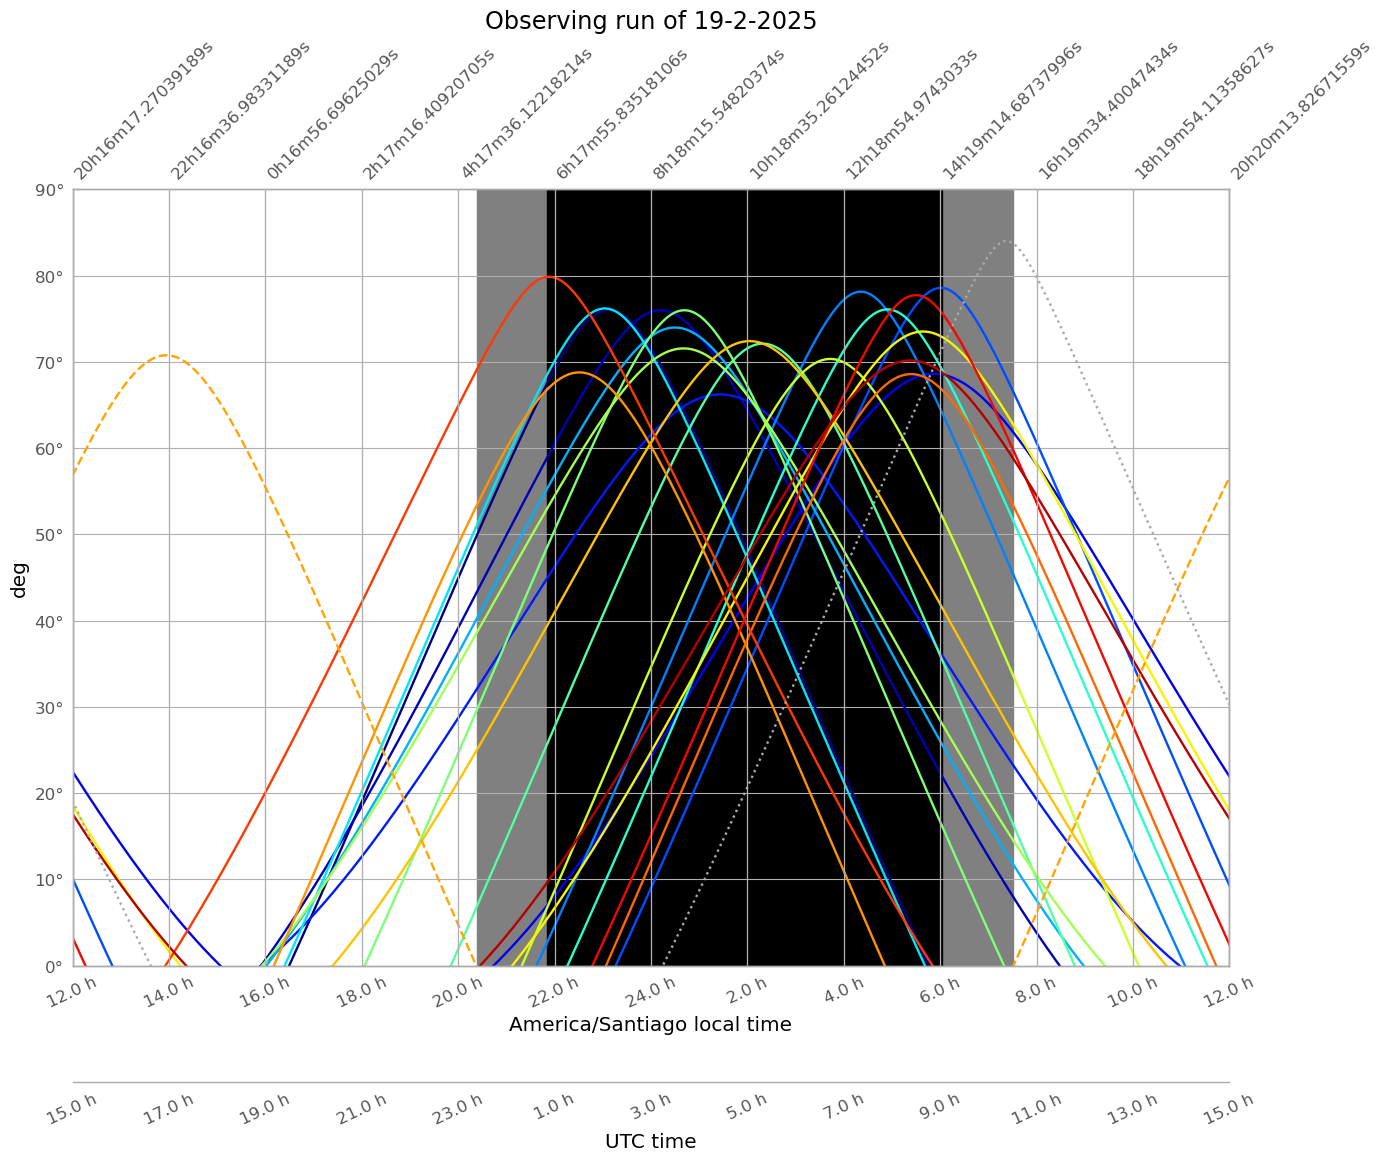

In [52]:

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)

for i,target_ in enumerate(final_targets):
    mag_ = final_target_dict[target_]['V']
    color_ = final_target_dict[target_]['B_V']
    ax.plot(delta_midnight,target_alts[target_],ls='-',color=color_dict[target_],label='{0}, V={1:.2f}, B-V={2:.2f}'.format(target_,mag_,color_))

ax.plot(delta_midnight,alt_sun_deg,ls='--',color='orange',label='Sun')
ax.plot(delta_midnight,alt_moon_deg,ls=':',color='darkgrey',label='Moon')
ax.set_xticks(delta_ticks)
ax.set_xticklabels(labels=local_ticks,rotation=25)
ax.set_xlim(-12*u.hour,12*u.hour)
ax.set_ylim(0*u.degree,90*u.degree)
ax.set_xlabel('{0} local time'.format(lsst_timezone))
ax.set_title('Observing run of {0}-{1}-{2}'.format(DAY,MONTH,YEAR))
#ax.legend(loc="upper right")


ax2 = ax.twiny()
ax2.plot([],[],ls='')
xticks = ax.get_xticks()
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels=sidereal_ticks,ha='left',rotation=45)
ax2.set_xlim(-12*u.hour,12*u.hour)

ax3 = ax.twiny()
# Move twinned axis ticks and label from top to bottom
ax3.xaxis.set_ticks_position("bottom")
ax3.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
offset = -0.15
ax3.spines["bottom"].set_position(("axes", offset))
ax3.set_frame_on(True)
ax3.patch.set_visible(False) # mandatory
for sp in ax3.spines.values():
    sp.set_visible(False)
ax3.spines["bottom"].set_visible(True)

ax3.set_xticks(xticks)
ax3.set_xticklabels(labels=utc_ticks,rotation=25)
ax3.set_xlabel('UTC time')


plt.tight_layout()

ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 alt_sun_deg < -0*u.deg, color='0.5', zorder=0)
ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 alt_sun_deg < -18*u.deg, color='k', zorder=0)

In [53]:
midnight_utc

<Time object: scale='utc' format='iso' value=2025-02-20 02:59:59.00>

# Separate blue and red stars 

In [54]:
blue_targets = []
red_targets = []
B_V = []

for target_ in final_targets:
    color_ =  final_target_dict[target_]['B']-final_target_dict[target_]['V']
    B_V.append(color_)
    if color_<=0.:
        blue_targets.append(target_)
    else:
        red_targets.append(target_)
B_V = np.array(B_V)

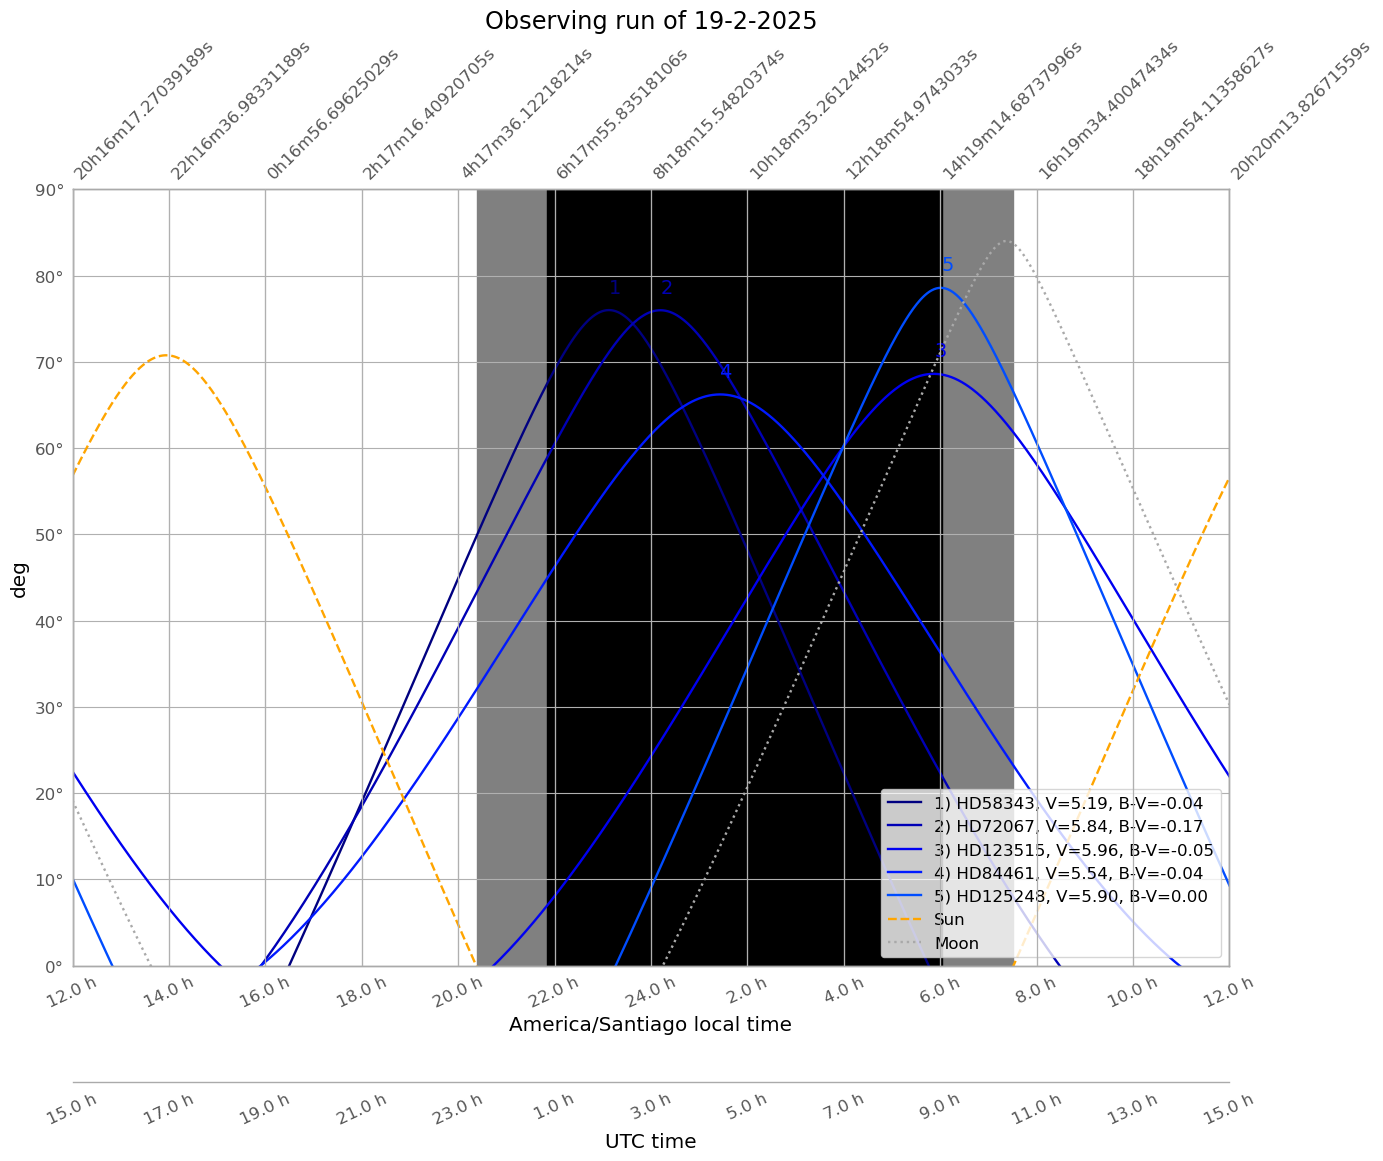

In [55]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)

i = 1
for target_ in blue_targets:
    mag_ = final_target_dict[target_]['V']
    color_ = final_target_dict[target_]['B_V']
    if np.max(target_alts[target_])<max_alt:
        ax.plot(delta_midnight,target_alts[target_],ls='-',color=color_dict[target_],label='{0}) {1}, V={2:.2f}, B-V={3:.2f}'.format(i,target_,mag_,color_))
        ax.text(delta_midnight[target_alts[target_]==np.max(target_alts[target_])],np.max(target_alts[target_])+2*u.deg,i,fontsize=14,color=color_dict[target_])
        i+=1

ax.plot(delta_midnight,alt_sun_deg,ls='--',color='orange',label='Sun')
ax.plot(delta_midnight,alt_moon_deg,ls=':',color='darkgrey',label='Moon')
ax.set_xticks(delta_ticks)
ax.set_xticklabels(labels=local_ticks,rotation=25)
ax.set_xlim(-12*u.hour,12*u.hour)
ax.set_ylim(0*u.degree,90*u.degree)
ax.set_xlabel('{0} local time'.format(lsst_timezone))
ax.set_title('Observing run of {0}-{1}-{2}'.format(DAY,MONTH,YEAR))
ax.legend(loc="lower right")


ax2 = ax.twiny()
ax2.plot([],[],ls='')
xticks = ax.get_xticks()
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels=sidereal_ticks,ha='left',rotation=45)
ax2.set_xlim(-12*u.hour,12*u.hour)

ax3 = ax.twiny()
# Move twinned axis ticks and label from top to bottom
ax3.xaxis.set_ticks_position("bottom")
ax3.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
offset = -0.15
ax3.spines["bottom"].set_position(("axes", offset))
ax3.set_frame_on(True)
ax3.patch.set_visible(False) # mandatory
for sp in ax3.spines.values():
    sp.set_visible(False)
ax3.spines["bottom"].set_visible(True)

ax3.set_xticks(xticks)
ax3.set_xticklabels(labels=utc_ticks,rotation=25)
ax3.set_xlabel('UTC time')


plt.tight_layout()

ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 alt_sun_deg < -0*u.deg, color='0.5', zorder=0)
ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 alt_sun_deg < -18*u.deg, color='k', zorder=0)

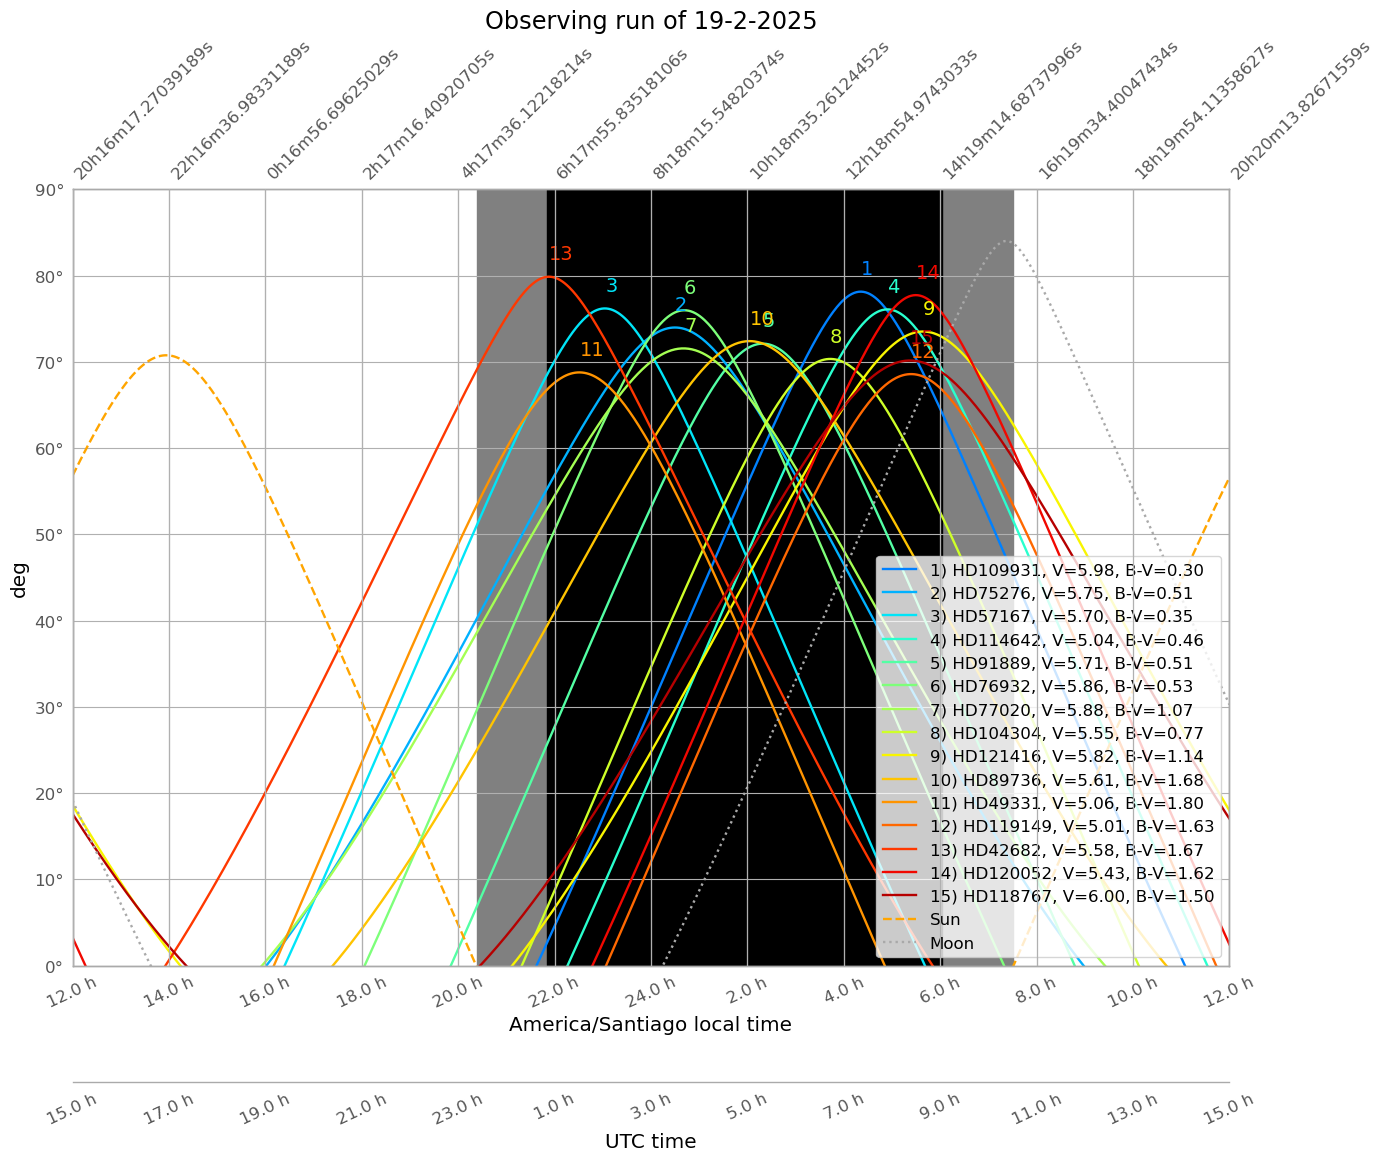

In [56]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)

i = 1
for target_ in red_targets:
    mag_ = final_target_dict[target_]['V']
    color_ = final_target_dict[target_]['B_V']
    if np.max(target_alts[target_])<max_alt:
        ax.plot(delta_midnight,target_alts[target_],ls='-',color=color_dict[target_],label='{0}) {1}, V={2:.2f}, B-V={3:.2f}'.format(i,target_,mag_,color_))
        ax.text(delta_midnight[target_alts[target_]==np.max(target_alts[target_])],np.max(target_alts[target_])+2*u.deg,i,fontsize=14,color=color_dict[target_])
        i+=1

ax.plot(delta_midnight,alt_sun_deg,ls='--',color='orange',label='Sun')
ax.plot(delta_midnight,alt_moon_deg,ls=':',color='darkgrey',label='Moon')
ax.set_xticks(delta_ticks)
ax.set_xticklabels(labels=local_ticks,rotation=25)
ax.set_xlim(-12*u.hour,12*u.hour)
ax.set_ylim(0*u.degree,90*u.degree)
ax.set_xlabel('{0} local time'.format(lsst_timezone))
ax.set_title('Observing run of {0}-{1}-{2}'.format(DAY,MONTH,YEAR))
ax.legend(loc="lower right")


ax2 = ax.twiny()
ax2.plot([],[],ls='')
xticks = ax.get_xticks()
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels=sidereal_ticks,ha='left',rotation=45)
ax2.set_xlim(-12*u.hour,12*u.hour)

ax3 = ax.twiny()
# Move twinned axis ticks and label from top to bottom
ax3.xaxis.set_ticks_position("bottom")
ax3.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
offset = -0.15
ax3.spines["bottom"].set_position(("axes", offset))
ax3.set_frame_on(True)
ax3.patch.set_visible(False) # mandatory
for sp in ax3.spines.values():
    sp.set_visible(False)
ax3.spines["bottom"].set_visible(True)

ax3.set_xticks(xticks)
ax3.set_xticklabels(labels=utc_ticks,rotation=25)
ax3.set_xlabel('UTC time')


plt.tight_layout()

ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 alt_sun_deg < -0*u.deg, color='0.5', zorder=0)
ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 alt_sun_deg < -18*u.deg, color='k', zorder=0)

## For our purposes, select the N redest stars 

In [87]:
Nredest = 14
redest_targets = np.array(final_targets)[B_V.argsort()[::-1]][:Nredest]
print(redest_targets)
print(B_V[B_V.argsort()[::-1]][:Nredest])

['HD49331' 'HD89736' 'HD42682' 'HD119149' 'HD120052' 'HD118767' 'HD121416'
 'HD77020' 'HD104304' 'HD76932' 'HD75276' 'HD91889' 'HD114642' 'HD57167']
[1.79800034 1.67900038 1.67000008 1.62999964 1.62000036 1.5
 1.13999987 1.06799984 0.76999998 0.52999973 0.51499987 0.50999975
 0.46000004 0.35000038]


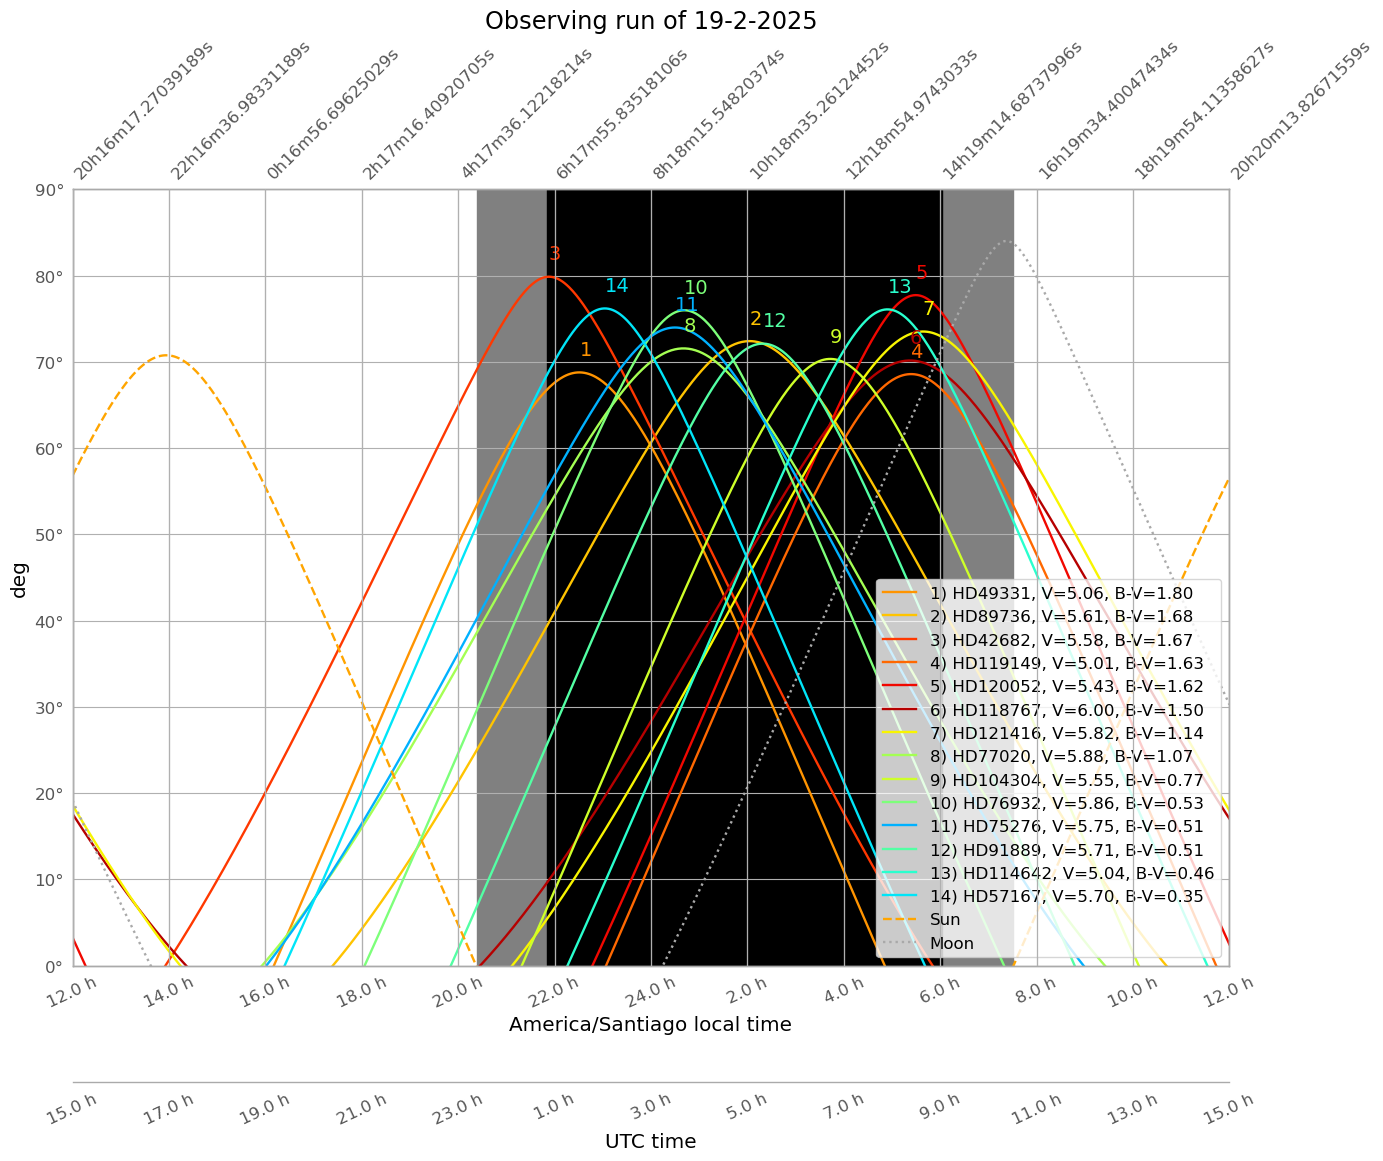

In [88]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)

i = 1
for target_ in redest_targets:
    mag_ = final_target_dict[target_]['V']
    color_ = final_target_dict[target_]['B_V']
    if np.max(target_alts[target_])<max_alt:
        ax.plot(delta_midnight,target_alts[target_],ls='-',color=color_dict[target_],label='{0}) {1}, V={2:.2f}, B-V={3:.2f}'.format(i,target_,mag_,color_))
        ax.text(delta_midnight[target_alts[target_]==np.max(target_alts[target_])],np.max(target_alts[target_])+2*u.deg,i,fontsize=14,color=color_dict[target_])
        i+=1

ax.plot(delta_midnight,alt_sun_deg,ls='--',color='orange',label='Sun')
ax.plot(delta_midnight,alt_moon_deg,ls=':',color='darkgrey',label='Moon')
ax.set_xticks(delta_ticks)
ax.set_xticklabels(labels=local_ticks,rotation=25)
ax.set_xlim(-12*u.hour,12*u.hour)
ax.set_ylim(0*u.degree,90*u.degree)
ax.set_xlabel('{0} local time'.format(lsst_timezone))
ax.set_title('Observing run of {0}-{1}-{2}'.format(DAY,MONTH,YEAR))
ax.legend(loc="lower right")


ax2 = ax.twiny()
ax2.plot([],[],ls='')
xticks = ax.get_xticks()
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels=sidereal_ticks,ha='left',rotation=45)
ax2.set_xlim(-12*u.hour,12*u.hour)

ax3 = ax.twiny()
# Move twinned axis ticks and label from top to bottom
ax3.xaxis.set_ticks_position("bottom")
ax3.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
offset = -0.15
ax3.spines["bottom"].set_position(("axes", offset))
ax3.set_frame_on(True)
ax3.patch.set_visible(False) # mandatory
for sp in ax3.spines.values():
    sp.set_visible(False)
ax3.spines["bottom"].set_visible(True)

ax3.set_xticks(xticks)
ax3.set_xticklabels(labels=utc_ticks,rotation=25)
ax3.set_xlabel('UTC time')


plt.tight_layout()

ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 alt_sun_deg < -0*u.deg, color='0.5', zorder=0)
ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 alt_sun_deg < -18*u.deg, color='k', zorder=0)

In [89]:
#target_selection = ['HD92055','HD123934','HD138716','HD156274','HD196171']
#target_selection = ['HD89736','HD123934','HD138716','HD156274','HD109931','HD189340','HD121416']
#target_selection = ['HD109931','HD121416','HD146233','HD138716','HD156274','HD189340','HD212320']
target_selection = redest_targets

### Include CALSPEC targets 

In [90]:
calspec_targets = ['HD34816']

In [91]:
print('Target name','  RA  ','  DEC  ','  B  ','  V  ','  B-V  ')
for target_ in calspec_targets:
    target_ = target_.replace('-',' ')
    try:
        target_info_ = Simbad.query_object(target_)
        print(target_info_)
        final_target_dict[target_] = {}
        ra_ = str(target_info_['RA'][0]).replace(' ',':')
        ra_ = hhmmss2deg(ra_)
        dec_ = str(target_info_['DEC'][0]).replace(' ',':')
        dec_ = degmmss2deg(dec_)
        b_ = float(target_info_['FLUX_B'][0])
        v_ = float(target_info_['FLUX_V'][0])
        r_ = float(target_info_['FLUX_R'][0])
        i_ = float(target_info_['FLUX_I'][0])
        b_v_ = b_-v_
        r_i_ = r_-i_

        print(target_,ra_,dec_,b_,v_,r_,i_,b_v_,r_i_)
        add_ = True
    except:
        print(target_)
        add_ = False
        
    if add_:
        final_target_dict[target_]['ra'] = ra_
        final_target_dict[target_]['dec'] = dec_
        final_target_dict[target_]['V'] = v_
        final_target_dict[target_]['B'] = b_
        final_target_dict[target_]['R'] = r_
        final_target_dict[target_]['I'] = i_
        final_target_dict[target_]['B_V'] = b_v_
        final_target_dict[target_]['R_I'] = r_i_
        
        #ra_ = hhmmss2deg(str(ra_))
        #dec_ = degmmss2deg(str(dec_))
        if dec_>=min_dec and dec_<=max_dec and ra_>=min_ra and ra_<=max_ra:
            target_selection = list(target_selection)+[target_]
            coords_ = SkyCoord(ra_,dec_,unit="deg")
            target_coords[target_] = coords_
            
            alt_ = coords_.transform_to(alt_frame)
            target_alts[target_] = alt_.alt
        else:
            print('OUT OF LIMITS')
            

Target name   RA     DEC     B     V     B-V  
 MAIN_ID        RA           DEC      RA_PREC ... FLUX_R FLUX_I SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"            ...  mag    mag                   
--------- ------------- ------------- ------- ... ------ ------ ----------------
* lam Lep 05 19 34.5223 -13 10 36.369      14 ...   4.41   4.69                1
HD34816 79.89384291666667 -13.176769166666666 4.039999961853027 4.289999961853027 4.409999847412109 4.690000057220459 -0.25 -0.2800002098083496
OUT OF LIMITS


In [92]:
cmap_final = plt.get_cmap('jet')
cNorm_final = colors.Normalize(vmin=0, vmax=len(target_selection))
scalarMap_final = cmx.ScalarMappable(norm=cNorm_final, cmap=cmap_final)
all_colors_final = scalarMap_final.to_rgba(np.arange(len(target_selection)), alpha=1)
color_dict_final = {}
for i,target_ in enumerate(target_selection):
    color_dict_final[target_] = all_colors_final[i]

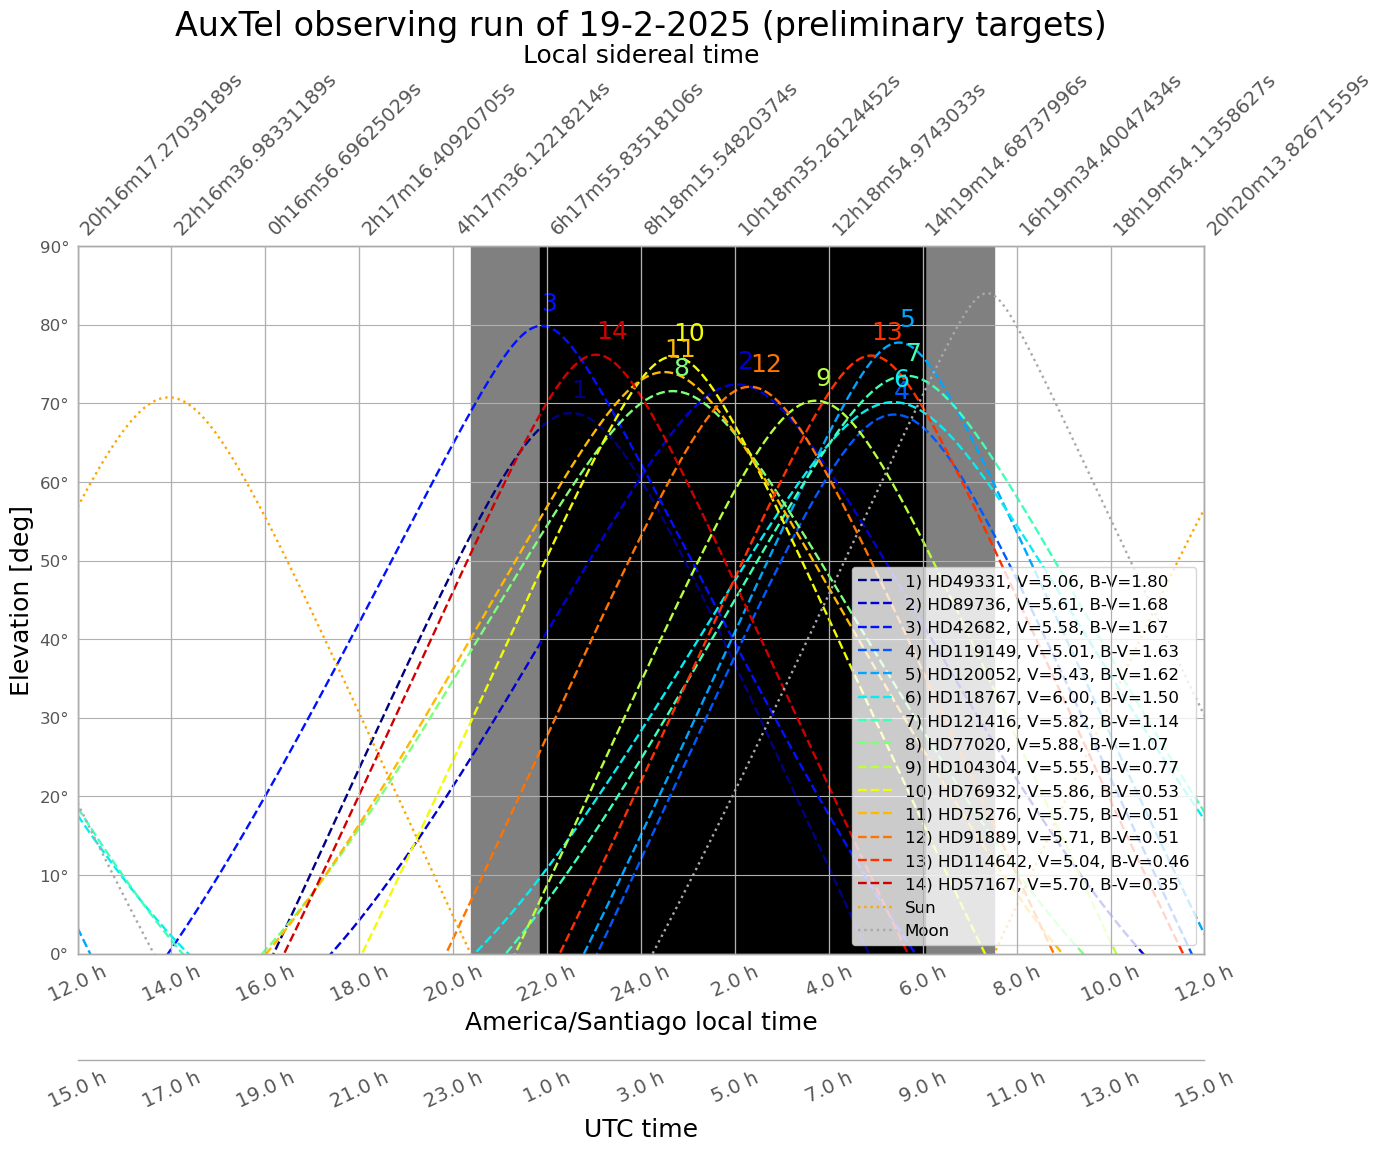

In [204]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)

i = 1
for target_ in target_selection:
    mag_ = final_target_dict[target_]['V']
    color_ = final_target_dict[target_]['B_V']
    if target_ in calspec_targets:
        ls_ = '-'
    else:
        ls_ = '--'
    if np.max(target_alts[target_])<max_alt:
        ax.plot(delta_midnight,target_alts[target_],ls=ls_,color=color_dict_final[target_],label='{0}) {1}, V={2:.2f}, B-V={3:.2f}'.format(i,target_,mag_,color_))
        ax.text(delta_midnight[target_alts[target_]==np.max(target_alts[target_])],np.max(target_alts[target_])+2*u.deg,i,fontsize=18,color=color_dict_final[target_])
        i+=1
        
ax.plot(delta_midnight,alt_sun_deg,ls=':',color='orange',label='Sun')
ax.plot(delta_midnight,alt_moon_deg,ls=':',color='darkgrey',label='Moon')
ax.set_xticks(delta_ticks)
ax.set_xticklabels(labels=local_ticks,rotation=25,fontsize=14)
ax.set_xlim(-12*u.hour,12*u.hour)
ax.set_ylim(0*u.degree,90*u.degree)
ax.set_xlabel('{0} local time'.format(lsst_timezone),fontsize=18)
ax.set_ylabel('Elevation [deg]',fontsize=18)
ax.set_title('AuxTel observing run of {0}-{1}-{2} (preliminary targets)'.format(DAY,MONTH,YEAR),fontsize=24)
ax.legend(loc="lower right")


ax2 = ax.twiny()
ax2.plot([],[],ls='')
xticks = ax.get_xticks()
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels=sidereal_ticks,ha='left',rotation=45,fontsize=14)
ax2.set_xlim(-12*u.hour,12*u.hour)
ax2.set_xlabel('Local sidereal time',fontsize=18)

ax3 = ax.twiny()
# Move twinned axis ticks and label from top to bottom
ax3.xaxis.set_ticks_position("bottom")
ax3.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
offset = -0.15
ax3.spines["bottom"].set_position(("axes", offset))
ax3.set_frame_on(True)
ax3.patch.set_visible(False) # mandatory
for sp in ax3.spines.values():
    sp.set_visible(False)
ax3.spines["bottom"].set_visible(True)

ax3.set_xticks(xticks)
ax3.set_xticklabels(labels=utc_ticks,rotation=25,fontsize=14)
ax3.set_xlabel('UTC time', fontsize=18)

ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 alt_sun_deg < -0*u.deg, color='0.5', zorder=0)
ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 alt_sun_deg < -18*u.deg, color='k', zorder=0)

plt.tight_layout()

In [94]:
def makePolarPlot(azimuthsInDegrees, zenithAngles, marker=".",ax=None,
                       title=None, color=None, objName=None,lw=0.5):
    if ax==None:
        _ = plt.figure(figsize=(20, 10))
        ax = plt.subplot(111, polar=True)
        
    ax.plot([a*np.pi/180 for a in azimuthsInDegrees], zenithAngles, marker, c=color, label=objName,lw=lw)
    if title:
        ax.set_title(title, va='bottom')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlim(0, 90)
    return ax

In [95]:
darktime_mask = alt_sun_deg < -18*u.deg

/tmp/ipykernel_12467/2340230159.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['N', '', 'E', '', 'S', '', 'W', ''])


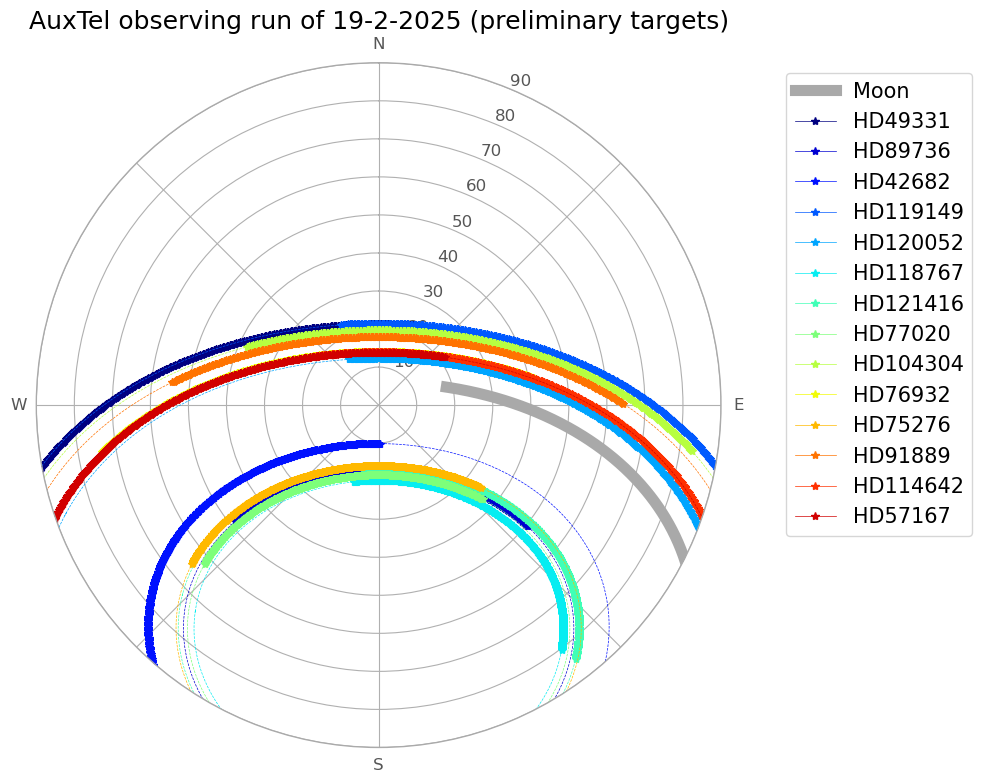

In [253]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, polar=True)

# compute zenith and azimuth angles
az_moon_deg = moon_altaz.az.deg
zen_moon_deg = moon_altaz.zen.deg

az_moon_deg_night = az_moon_deg[darktime_mask]
zen_moon_deg_night = zen_moon_deg[darktime_mask]
ax=makePolarPlot(az_moon_deg_night, zen_moon_deg_night,ax=ax ,marker=".-",title=None, color = "darkgrey",objName="Moon",lw=8)


for target_ in target_selection:
    
    target_altaz_ = target_coords[target_].transform_to(alt_frame)
    az_target_deg_ = target_altaz_.az.deg
    zen_target_deg_ = target_altaz_.zen.deg
    
    az_target_deg_night_ = az_target_deg_[darktime_mask]
    zen_target_deg_night_ = zen_target_deg_[darktime_mask]
    
    
    ax=makePolarPlot(az_target_deg_, zen_target_deg_,ax=ax, marker="--",title=None, color=color_dict_final[target_], lw=0.5)
    ax=makePolarPlot(az_target_deg_night_, zen_target_deg_night_,ax=ax ,marker="*-",title=None, color=color_dict_final[target_],objName=target_,lw=0.5)
    

ax.legend(bbox_to_anchor=(1.08, 1), prop={'size': 15}, loc='upper left')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim(0, 90)
ax.set_xticklabels(['N', '', 'E', '', 'S', '', 'W', ''])
ax.set_title('AuxTel observing run of {0}-{1}-{2} (preliminary targets)'.format(DAY,MONTH,YEAR),fontsize=18)
plt.tight_layout()

# Exposure time calculations 

In [97]:
import pandas as pd

In [98]:
(3000-1390)/2.69

598.5130111524164

In [99]:
# lambda_eff in units of pixel 
pix_factor = 2.69
pix0 = 1390
lambda_eff_b = int(445*pix_factor)+pix0
lambda_eff_v = int(551*pix_factor)+pix0
lambda_eff_r = int(658*pix_factor)+pix0
lambda_eff_i = int(806*pix_factor)+pix0
lambda_eff_b,lambda_eff_v,lambda_eff_r,lambda_eff_i

(2587, 2872, 3160, 3558)

In [100]:
def calc_int_adu(mag1,mag2,F1):
    F2 = F1*10.**((mag1-mag2)/2.5)
    return F2

In [101]:
lambda_eff_v

2872

In [102]:
t_exp_ref = 30.
b_mag_ref = 7.67
v_mag_ref = 7.5
int_adu_b_ref = 35014208.611328125 #/30s
int_adu_v_ref = 24776447.739257812 #/30s
num_pix_b = 505
num_pix_v = 473

In [166]:
saturation = 100000 #ADU/pix 
goal_adu = 10000 #ADU/pixel
Nposs = 17
t_security = 2. #s time gap to avoid saturation

In [221]:
names = ['Target','B','V','B-V','Int./pix B ({0}s)'.format(t_exp_ref),'Int./pix V ({0}s)'.format(t_exp_ref),'Int./pix/s B','Int./pix/s V','t exp B (s)','t exp V (s)','t exp (s)']

data = []
for target_ in target_selection:
    adu_pix_b_ = calc_int_adu(b_mag_ref,final_target_dict[target_]['B'],int_adu_b_ref)/num_pix_b
    adu_pix_v_ = calc_int_adu(v_mag_ref,final_target_dict[target_]['V'],int_adu_v_ref)/num_pix_v
    
    b_ = np.round(final_target_dict[target_]['B'],2)
    v_ = np.round(final_target_dict[target_]['V'],2)
    b_v_ = np.round(final_target_dict[target_]['B_V'],2)
    adu_pix_b_s_ = adu_pix_b_/t_exp_ref 
    adu_pix_v_s_ = adu_pix_v_/t_exp_ref 

    t_exp_b_ = saturation/adu_pix_b_s_
    t_exp_v_ = saturation/adu_pix_v_s_
    t_exp_max_ = np.round(np.min([t_exp_b_,t_exp_v_]),0)-t_security
    
    info_ = [target_,b_,v_,b_v_,adu_pix_b_,adu_pix_v_,adu_pix_b_s_,adu_pix_v_s_,t_exp_b_,t_exp_v_,t_exp_max_]
    data.append(info_)

df0 = pd.DataFrame(data,columns=names)
df0

,Target,B,V,B-V,Int./pix B (30.0s),Int./pix V (30.0s),Int./pix/s B,Int./pix/s V,t exp B (s),t exp V (s),t exp (s)
0,HD49331,6.86,5.06,1.80,146201.855141,494741.089092,4873.395171,16491.369636,20.519575,6.063778,4.0
1,HD89736,7.29,5.61,1.68,98118.940113,297562.338049,3270.631337,9918.744602,30.575137,10.081921,8.0
2,HD42682,7.25,5.58,1.67,102082.885349,307027.962401,3402.762845,10234.265413,29.387884,9.771097,8.0
3,HD119149,6.64,5.01,1.63,179041.204202,519012.488918,5968.040140,17300.416297,16.755919,5.780208,4.0
4,HD120052,7.05,5.43,1.62,122730.600878,352515.297895,4091.020029,11750.509930,24.443782,8.510269,7.0
5,HD118767,7.50,6.00,1.50,81087.318115,208534.492724,2702.910604,6951.149757,36.997154,14.386109,12.0
6,HD121416,6.95,5.82,1.14,133953.161259,247273.671355,4465.105375,8242.455712,22.395888,12.132307,10.0
7,HD77020,6.94,5.88,1.07,135317.208452,233764.160883,4510.573615,7792.138696,22.170129,12.833447,11.0
8,HD104304,6.32,5.55,0.77,240410.188029,315629.671702,8013.672934,10520.989057,12.478672,9.504810,8.0
9,HD76932,6.39,5.86,0.53,225399.521728,237234.499785,7513.317391,7907.816660,13.309700,12.645716,11.0


In [222]:
t_exp_min = 5. #Minimum exposure time we want 

In [223]:
Nexp_min = 3 #Minimum number of exposures we want for each X position 

In [225]:
#string0 = 'Target \t ADU/pix (30s) \t t_exp (s) \t N_exp \t Total time (s) \n'.format(t_exp)
#print(string0)

colnames = list(df0.columns)+['N_exp','t_total (s)','total ADU/pix (V)','Meets goal']
data = []
for i,target_ in enumerate(target_selection):
    if df0.loc[i]['t exp (s)']>=t_exp_min:
        t_exp_ = df0.loc[i]['t exp (s)']
        adu_pix_v_ = df0.loc[i]['Int./pix/s V']*t_exp_
    
        #Nexp_ = int(np.round(goal_adu/adu_pix_v_,0))
        Nexp_ = goal_adu/adu_pix_v_
        print(Nexp_)
        if Nexp_<Nexp_min:
            Nexp_ = N_exp_min
        total_time_ = Nexp_*int(t_exp_)*Nposs
        total_adu_pix_v_ = adu_pix_v_*total_time_
        good_ = total_adu_pix_v_>=goal_adu

        info_ = list(df0.loc[i])+[Nexp_,total_time_,total_adu_pix_v_,good_]
        data.append(info_)
    #string_ = '{0} \t {1} \t {2} \t {3} \t {4} \n'.format(target_,adu_pix_,int(t_exp),Nexp_,total_time_)
    #print(string_)

df_final = pd.DataFrame(data,columns=colnames)
df_final

0.12602401313917852
0.12213871240520636
0.12157527095443701
0.11988424396099712
0.12132306620268782
0.1166677011978867
0.11881012262832712
0.1149610503423248
0.12673626480665573
0.12237729816456556
0.13641222463822245


,Target,B,V,B-V,Int./pix B (30.0s),Int./pix V (30.0s),Int./pix/s B,Int./pix/s V,t exp B (s),t exp V (s),t exp (s),N_exp,t_total (s),total ADU/pix (V),Meets goal
0,HD89736,7.29,5.61,1.68,98118.940113,297562.338049,3270.631337,9918.744602,30.575137,10.081921,8.0,3,408,3.237478e+07,True
1,HD42682,7.25,5.58,1.67,102082.885349,307027.962401,3402.762845,10234.265413,29.387884,9.771097,8.0,3,408,3.340464e+07,True
2,HD120052,7.05,5.43,1.62,122730.600878,352515.297895,4091.020029,11750.509930,24.443782,8.510269,7.0,3,357,2.936452e+07,True
3,HD118767,7.50,6.00,1.50,81087.318115,208534.492724,2702.910604,6951.149757,36.997154,14.386109,12.0,3,612,5.104924e+07,True
4,HD121416,6.95,5.82,1.14,133953.161259,247273.671355,4465.105375,8242.455712,22.395888,12.132307,10.0,3,510,4.203652e+07,True
5,HD77020,6.94,5.88,1.07,135317.208452,233764.160883,4510.573615,7792.138696,22.170129,12.833447,11.0,3,561,4.808529e+07,True
6,HD104304,6.32,5.55,0.77,240410.188029,315629.671702,8013.672934,10520.989057,12.478672,9.504810,8.0,3,408,3.434051e+07,True
7,HD76932,6.39,5.86,0.53,225399.521728,237234.499785,7513.317391,7907.816660,13.309700,12.645716,11.0,3,561,4.879914e+07,True
8,HD75276,6.26,5.75,0.51,253368.681962,263013.379668,8445.622732,8767.112656,11.840453,11.406264,9.0,3,459,3.621694e+07,True
9,HD91889,6.22,5.71,0.51,263604.621921,272381.673997,8786.820731,9079.389133,11.380681,11.013957,9.0,3,459,3.750696e+07,True


In [226]:
final_targets = list(df_final['Target'])
final_targets,len(final_targets)

(['HD89736',
  'HD42682',
  'HD120052',
  'HD118767',
  'HD121416',
  'HD77020',
  'HD104304',
  'HD76932',
  'HD75276',
  'HD91889',
  'HD57167'],
 11)

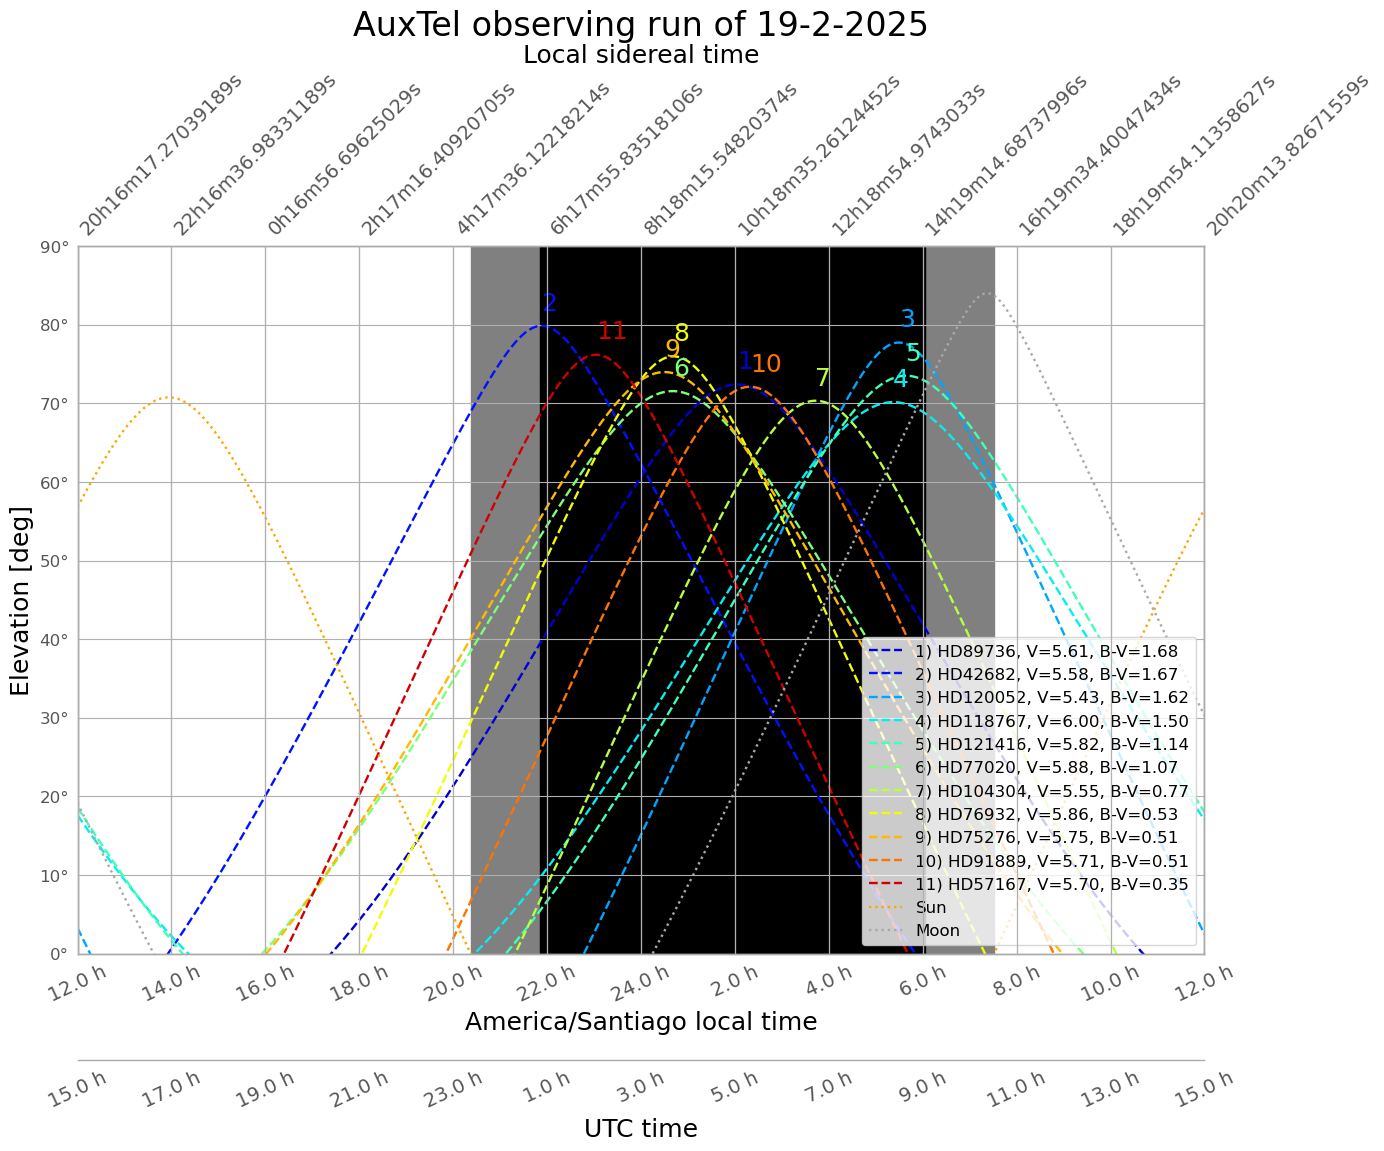

In [227]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)

i = 1
for target_ in final_targets:
    mag_ = final_target_dict[target_]['V']
    color_ = final_target_dict[target_]['B_V']
    if target_ in calspec_targets:
        ls_ = '-'
    else:
        ls_ = '--'
    if np.max(target_alts[target_])<max_alt:
        ax.plot(delta_midnight,target_alts[target_],ls=ls_,color=color_dict_final[target_],label='{0}) {1}, V={2:.2f}, B-V={3:.2f}'.format(i,target_,mag_,color_))
        ax.text(delta_midnight[target_alts[target_]==np.max(target_alts[target_])],np.max(target_alts[target_])+2*u.deg,i,fontsize=18,color=color_dict_final[target_])
        i+=1
        
ax.plot(delta_midnight,alt_sun_deg,ls=':',color='orange',label='Sun')
ax.plot(delta_midnight,alt_moon_deg,ls=':',color='darkgrey',label='Moon')
ax.set_xticks(delta_ticks)
ax.set_xticklabels(labels=local_ticks,rotation=25,fontsize=14)
ax.set_xlim(-12*u.hour,12*u.hour)
ax.set_ylim(0*u.degree,90*u.degree)
ax.set_xlabel('{0} local time'.format(lsst_timezone),fontsize=18)
ax.set_ylabel('Elevation [deg]',fontsize=18)
ax.set_title('AuxTel observing run of {0}-{1}-{2}'.format(DAY,MONTH,YEAR),fontsize=24)
ax.legend(loc="lower right")


ax2 = ax.twiny()
ax2.plot([],[],ls='')
xticks = ax.get_xticks()
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels=sidereal_ticks,ha='left',rotation=45,fontsize=14)
ax2.set_xlim(-12*u.hour,12*u.hour)
ax2.set_xlabel('Local sidereal time',fontsize=18)

ax3 = ax.twiny()
# Move twinned axis ticks and label from top to bottom
ax3.xaxis.set_ticks_position("bottom")
ax3.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
offset = -0.15
ax3.spines["bottom"].set_position(("axes", offset))
ax3.set_frame_on(True)
ax3.patch.set_visible(False) # mandatory
for sp in ax3.spines.values():
    sp.set_visible(False)
ax3.spines["bottom"].set_visible(True)

ax3.set_xticks(xticks)
ax3.set_xticklabels(labels=utc_ticks,rotation=25,fontsize=14)
ax3.set_xlabel('UTC time', fontsize=18)

ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 alt_sun_deg < -0*u.deg, color='0.5', zorder=0)
ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 alt_sun_deg < -18*u.deg, color='k', zorder=0)

plt.tight_layout()
plt.savefig(os.path.join(outdir,'targets_{0}-{1}-{2}_alt-time.png'.format(DAY,MONTH,YEAR)))

/tmp/ipykernel_12467/3810336441.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['N', '', 'E', '', 'S', '', 'W', ''])


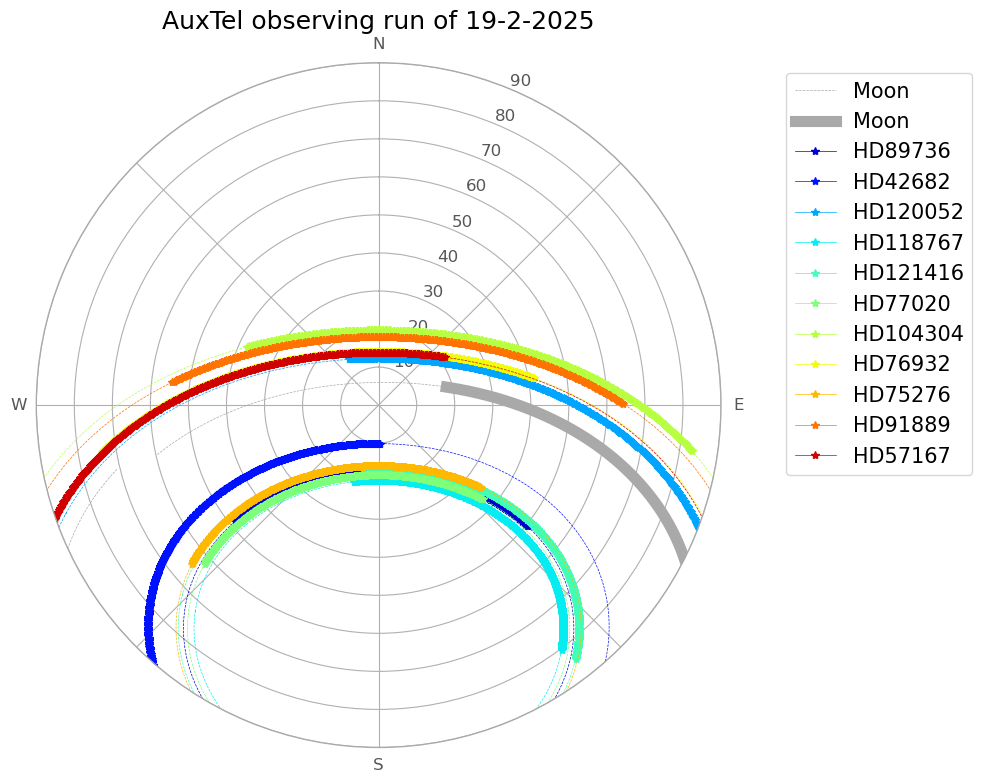

In [254]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, polar=True)

# compute zenith and azimuth angles
az_moon_deg = moon_altaz.az.deg
zen_moon_deg = moon_altaz.zen.deg

az_moon_deg_night = az_moon_deg[darktime_mask]
zen_moon_deg_night = zen_moon_deg[darktime_mask]
ax=makePolarPlot(az_moon_deg, zen_moon_deg,ax=ax ,marker="--",title=None, color = "darkgrey",objName="Moon",lw=0.5)
ax=makePolarPlot(az_moon_deg_night, zen_moon_deg_night,ax=ax ,marker=".-",title=None, color = "darkgrey",objName="Moon",lw=8)


for target_ in final_targets:
    
    target_altaz_ = target_coords[target_].transform_to(alt_frame)
    az_target_deg_ = target_altaz_.az.deg
    zen_target_deg_ = target_altaz_.zen.deg
    
    az_target_deg_night_ = az_target_deg_[darktime_mask]
    zen_target_deg_night_ = zen_target_deg_[darktime_mask]
    
    
    ax=makePolarPlot(az_target_deg_, zen_target_deg_,ax=ax, marker="--",title=None, color=color_dict_final[target_], lw=0.5)
    ax=makePolarPlot(az_target_deg_night_, zen_target_deg_night_,ax=ax ,marker="*-",title=None, color=color_dict_final[target_],objName=target_,lw=0.5)
    

ax.legend(bbox_to_anchor=(1.08, 1), prop={'size': 15}, loc='upper left')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim(0, 90)
ax.set_xticklabels(['N', '', 'E', '', 'S', '', 'W', ''])
ax.set_title('AuxTel observing run of {0}-{1}-{2}'.format(DAY,MONTH,YEAR),fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(outdir,'targets_{0}-{1}-{2}_az-zen.png'.format(DAY,MONTH,YEAR)))

## Save selected targets 

In [229]:
df_final.to_csv(os.path.join(outdir,'target_exptime_{0}-{1}-{2}.txt'.format(DAY,MONTH,YEAR)),sep='\t',index=False)

In [240]:
colnames = ['Target','t exp (s)','N_exp','t_total (s)','total ADU/pix (V)']
data = []
for i,target_ in enumerate(final_targets):
    info_ = df_final.loc[i][colnames]
    data.append(info_)

df_final_reduced = pd.DataFrame(data,columns=colnames)
df_final_reduced

df_final_reduced.to_csv(os.path.join(outdir,'target_exptime_{0}-{1}-{2}_reduced.txt'.format(DAY,MONTH,YEAR)),sep='\t',index=False)

In [238]:
colnames = ['Target','RA','DEC','B','V','B-V']
data = []
for target_ in final_targets:
    h_,m_,s_ = target_coords[target_].ra.hms
    ra_ = '{0:02d}:{1}:{2:.4f}'.format(int(h_),int(m_),s_)
    d_,m_,s_ = target_coords[target_].dec.dms
    if d_<0.:
        d_ = '-{0:02d}'.format(np.abs(int(d_)))
    else:
        d_ = '{0:02d}'.format(int(d_))
    if np.abs(s_)<10.:
        dec_ = '{0}:{1}:0{2:.4f}'.format(d_,int(np.abs(m_)),np.abs(s_))
    else:
        dec_ = '{0}:{1}:{2:.4f}'.format(d_,int(np.abs(m_)),np.abs(s_))
    b_ = np.round(final_target_dict[target_]['B'],2)
    v_ = np.round(final_target_dict[target_]['V'],2)
    b_v_ = np.round(final_target_dict[target_]['B_V'],2)
    
    info_ = [target_,ra_,dec_,b_,v_,b_v_]
    data.append(info_)
df_coords = pd.DataFrame(data,columns=colnames)
df_coords
df_coords.to_csv(os.path.join(outdir,'target_coords_{0}-{1}-{2}.txt'.format(DAY,MONTH,YEAR)),sep='\t',index=False)

## Display targets in Aladin 

In [79]:
from mpl_toolkits.mplot3d import Axes3D

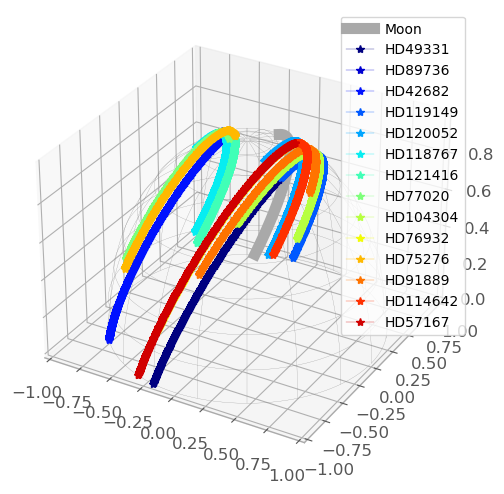

In [241]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

r = 1

alts = np.arange(0.,90.,10)*np.pi/180.
azs = np.arange(0.,360.,1)*np.pi/180.

for alt_ in alts:
    x_ = r*np.cos(azs)*np.cos(alt_)
    y_ = r*np.sin(azs)*np.cos(alt_)
    z_ = r*np.sin(alt_)
    ax.plot(x_,y_,z_,ls='-',color='grey',lw='0.15')
    #ax.plot(x_,y_)

alts = np.arange(0.,90.,1)*np.pi/180.
azs = np.arange(0.,360.,20)*np.pi/180.

for az_ in azs:
    x_ = r*np.cos(az_)*np.cos(alts)
    y_ = r*np.sin(az_)*np.cos(alts)
    z_ = r*np.sin(alts)
    ax.plot(x_,y_,z_,ls='-',color='grey',lw='0.15')
    #ax.plot(x_,y_)


# compute zenith and azimuth angles
az_moon = moon_altaz.az.radian
alt_moon = moon_altaz.alt.radian

az_moon_night = az_moon[darktime_mask]
alt_moon_night = alt_moon[darktime_mask]

alt_mask = alt_moon_night>=0.

az_moon_vis = az_moon_night[alt_mask]
alt_moon_vis = alt_moon_night[alt_mask]

xmoon = r*np.cos(az_moon_vis)*np.cos(alt_moon_vis)
ymoon = r*np.sin(az_moon_vis)*np.cos(alt_moon_vis)
zmoon = r*np.sin(alt_moon_vis)

ax.plot(xmoon,ymoon,zmoon,ls='-',marker='',color='darkgrey',label='Moon',lw=8)

for target_ in target_selection:
    
    target_altaz_ = target_coords[target_].transform_to(alt_frame)
    az_target_ = target_altaz_.az.radian
    alt_target_ = target_altaz_.alt.radian
    
    az_target_night_ = az_target_[darktime_mask]
    alt_target_night_ = alt_target_[darktime_mask]

    alt_mask_ = alt_target_night_>=0.
    
    az_target_vis_ = az_target_night_[alt_mask_]
    alt_target_vis_ = alt_target_night_[alt_mask_]
    
    x_ = r*np.cos(az_target_vis_)*np.cos(alt_target_vis_)
    y_ = r*np.sin(az_target_vis_)*np.cos(alt_target_vis_)
    z_ = r*np.sin(alt_target_vis_)
    
    ax.plot(x_,y_,z_,ls='-',marker="*",color=color_dict_final[target_],lw=0.25,label=target_)
    #ax=makePolarPlot(az_target_deg_, zen_target_deg_,ax=ax, marker="--",title=None, color=color_dict_final[target_], lw=0.5)
    #ax=makePolarPlot(az_target_deg_night_, zen_target_deg_night_,ax=ax ,marker="*-",title=None, color=color_dict_final[target_],objName=target_,lw=0.5)
    

ax.set_xlim(-1.,1.)
ax.set_ylim(-1.,1.)
ax.set_zlim(0.,)
ax.legend(loc="best",fontsize=10)


In [194]:
from ipyaladin import Aladin
from sidecar import Sidecar

In [195]:
from astropy.coordinates import Angle

In [242]:
aladin = Aladin()
with Sidecar(title="aladin_output"):
    display(aladin)

In [243]:
aladin.fov = Angle(6.3 * u.arcmin)

In [244]:
print(len(final_targets))

11


In [202]:
view_target = 0
aladin.target = target_coords[final_targets[view_target]]

In [249]:
for target_ in final_targets:
    aladin = Aladin()
    with Sidecar(title="aladin_{0}".format(target_)):
        display(aladin)
    aladin.fov = Angle(6.3 * u.arcmin)
    aladin.target = target_coords[target_]